### Imports

In [1]:
# ! pip install geocoder
# ! pip install google
# ! pip install python-google-places
# ! pip install geolocation-python
# ! pip install plotly
# ! pip install cufflinks
# ! pip install oauth2
# ! pip install gspread
# ! pip install oauth2client
# ! pip install xgboost
# ! pip install dj-database-url
# ! pip install sklearn
# ! pip install numpy
# ! pip install scipy
# ! pip install sklearn
# ! pip install bs4
# ! pip install matplotlib
# ! pip install seaborn
# ! pip install statsmodels
# ! pip install tensorflow

In [2]:
import numpy as np
import scipy
import sklearn as sk
import matplotlib.pyplot as plt
import math
from math import pi
# from just_some_functions import *
from statistics import *
from scipy.stats import *
import statsmodels.api as sm
from decimal import Decimal
import seaborn as sns

from googlesearch import search

import googleplaces
from googleplaces import GooglePlaces, types, lang
from geolocation.main import GoogleMaps

import geocoder

import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

import gspread
from gspread import *
import pandas as pd

from oauth2client.service_account import ServiceAccountCredentials

import time
from datetime import *

import random

# from io import StringIO
# import requests


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier 
from sklearn.ensemble import RandomForestClassifier

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse

Need to run the cell below for the initial load of the data

In [4]:
# scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']

# credentials = ServiceAccountCredentials.from_json_keyfile_name('json/dungeon runner-6a51b68a1239.json', scope)

# gspread_credentials = gspread.authorize(credentials)

# expense_related_worksheet = gspread_credentials.open_by_key('1tKPle0EOUtjTcFtqLqHXcM_iPxlf3MV4RYHfi59d8k0') 

# work_hours_related_worksheet = gspread_credentials.open_by_key('1RdACxeor-Y4NZlmiAU1eQopvcU_I2J54KOpc2AWYfU8')

# expense_categories = expense_related_worksheet.sheet1

# work_hours_categories = work_hours_related_worksheet.sheet1

# api_key_data_frame_source = pd.DataFrame(keys.get_all_records())

# api_key_data_frame = api_key_data_frame_source.copy()
    

In [5]:
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']

pi_credentials = ServiceAccountCredentials.from_json_keyfile_name('json/the-intelligent-budget-237104-3b5849d1aed7.json', scope)

sojourner_credentials = gspread.authorize(pi_credentials)

expense_related_worksheet = sojourner_credentials.open_by_key('1tKPle0EOUtjTcFtqLqHXcM_iPxlf3MV4RYHfi59d8k0')

work_hours_related_worksheet = sojourner_credentials.open_by_key('1RdACxeor-Y4NZlmiAU1eQopvcU_I2J54KOpc2AWYfU8')

key = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
api_keys = ServiceAccountCredentials.from_json_keyfile_name('json/the-intelligent-budget-237104-3b5849d1aed7.json', key)
api_credentials = gspread.authorize(api_keys)
key_relations = api_credentials.open_by_key('1VuylGh-QIee1dHsWnaDoq_mVMmEtP76KZbV59qe3PCE')



In [6]:
expense_categories = expense_related_worksheet.sheet1

work_hours_categories = work_hours_related_worksheet.sheet1

keys = key_relations.sheet1

api_key_data_frame_source = pd.DataFrame(keys.get_all_records())

api_key_data_frame = api_key_data_frame_source.copy()
    

In [7]:
#Place the related line below in all functions relating to retrieving data from the worksheets
#Commented here so they do not load twice every time I run this cell.

# expense_categories_data_frame = pd.DataFrame(expense_categories.get_all_records())
# work_hours_categories_data_frame = pd.DataFrame(work_hours_categories.get_all_records())

# line = requests.get("https://docs.google.com/spreadsheets/d/1GYQAl8UUgqTWFTPOzdc1ytrL5TrIoI67Yr4ThFAf_Fk/edit?usp=sharing")
# expense_data_set = line.content 
# expense_data_frame = pd.read_excel(StringIO(expense_data_set), index_col=1, parse_dates=['purchase_date'])


In [8]:
def perform_google_search(s):
    #search_results = search(query=s)
    for search_result in search(s, tld="com", num=10, stop=5, pause=2): 
        print(search_result) 

In [9]:
def get_and_load_api_keys():
    google_places = GooglePlaces("api_key_data_frame['GooglePlaces'][1]")
    google_maps = GoogleMaps("api_key_data_frame['GooglePlaces'][1]")
    
    # mapquest_maps = api_key_data_frame['Mapquest'][0]
    
    return google_places, google_maps,


In [10]:
get_and_load_api_keys()

(<googleplaces.GooglePlaces at 0x7f26671c3358>,
 <geolocation.main.GoogleMaps at 0x7f26671c3128>)

In [11]:
# current_location = [51.4671631, 0.1174969]
# NEED a get_current_location():
def get_current_location():
    current_location = geocoder.ip('me')
    latitude = current_location.latlng[0]
    longitude = current_location.latlng[1]
    return latitude, longitude


#Need to pass current location to dictionary
# google_places.nearby_search(location=current_location)



In [12]:
# address = "New York City Wall Street 12"

# location = google_maps.search(location=address) # sends search to Google Maps.

# print(location.all()) # returns all locations.


In [13]:
# google_places = GooglePlaces("api_key_data_frame['GooglePlaces'][0]")

In [14]:
expense_categories_data_frame_source = pd.DataFrame(expense_categories.get_all_records())
expense_categories_data_frame = expense_categories_data_frame_source.copy()


In [15]:
work_hours_categories_data_frame_source = pd.DataFrame(work_hours_categories.get_all_records())
work_hours_categories_data_frame = work_hours_categories_data_frame_source.copy()


In [16]:
def check_data_frame_data_type():
    print('Expense Categories: \n')
    print(expense_categories_data_frame.columns.to_series().groupby(expense_categories_data_frame.dtypes).groups)
    print('Work Caregories: \n')
    print(work_hours_categories_data_frame.columns.to_series().groupby(work_hours_categories_data_frame.dtypes).groups)

In [17]:
# check_data_frame_data_type()

Each time must run the "get all records" function to pull new information.

In [18]:
def load_expense_data():
    expense_categories_data_frame_source = pd.DataFrame(expense_categories.get_all_records())
    expense_categories_data_frame = expense_categories_data_frame_source.copy()
    expense_categories_data_frame.columns
    return expense_categories_data_frame.head()

def check_expense_data_for_null():
    expense_categories_data_frame_source = pd.DataFrame(expense_categories.get_all_records())
    expense_categories_data_frame = expense_categories_data_frame_source.copy()
    expense_categories_data_frame.columns
    return expense_categories_data_frame.info()

def load_work_hours_data():
    work_hours_categories_data_frame_source = pd.DataFrame(work_hours_categories.get_all_records())
    work_hours_categories_data_frame = work_hours_categories_data_frame_source.copy()
    work_hours_categories_data_frame.columns
    return work_hours_categories_data_frame.head()

def check_work_hours_data_for_null():
    work_hours_categories_data_frame_source = pd.DataFrame(work_hours_categories.get_all_records())
    work_hours_categories_data_frame = work_hours_categories_data_frame_source.copy()
    work_hours_categories_data_frame.columns
    return work_hours_categories_data_frame.info()

In [19]:
def load_all_data():
    return load_expense_data(), load_work_hours_data(), get_and_load_api_keys()    
    

In [20]:
load_all_data()

(    distance_from_home_in_miles distance_from_home_vector merchant_category  \
 0                             5                  0.059591       Supermarket   
 1                             3                 0.0349393      Liquor Store   
 2                                                              Record Store   
 3                                                           Online Retailer   
 4                                                           Online Retailer   
 
   merchant_with_highest_amount  purchase_amount purchase_category  \
 0                       Publix             10.0              Food   
 1                       Publix              0.0          Beverage   
 2                          FYE              0.0     Entertainment   
 3                       Amazon              0.0     Entertainment   
 4                       Amazon              0.0     Entertainment   
 
   purchase_date recurring repurchase  
 0    31/12/2018     FALSE       TRUE  
 1    01/01/2019

In [21]:
# load_expense_data()

In [22]:
# check_expense_data()

In [23]:
# load_work_hours_data()

In [24]:
# check_work_hours_data()

Start "don't need"

In [25]:
#avg_work_hrs_yr = 40 * 52
#print(avg_work_hrs_yr)

In [26]:
# hours = pd.readcsv('work_hours.csv')
# hr_per_week = pd.readcsv('work_week.csv')

# set hourly rate
# rates = pd.readcsv('hourly_rate.csv')

# deduction = pd.readcsv('deductions.csv')

# hours = np.loadtxt("work_hours.txt")
# hours_per_week = np.loadtxt("work_week.txt")
# hourly_rates = np.loadtxt("hourly_rate.txt")
# pre_tax_deduction = np.loadtxt("pre_tax_deductions.txt")
# salary = np.loadtxt("annual_salary.txt")

In [27]:
#hours_worked_so_far = []
#def weeks_worked(): 
#    for i in hours:
#        if i != 0:
#            hours_worked_so_far.append(i)
#    return len(hours_worked_so_far)

#print(weeks_worked())

In [28]:
load_all_data() 

(    distance_from_home_in_miles distance_from_home_vector merchant_category  \
 0                             5                  0.059591       Supermarket   
 1                             3                 0.0349393      Liquor Store   
 2                                                              Record Store   
 3                                                           Online Retailer   
 4                                                           Online Retailer   
 
   merchant_with_highest_amount  purchase_amount purchase_category  \
 0                       Publix             10.0              Food   
 1                       Publix              0.0          Beverage   
 2                          FYE              0.0     Entertainment   
 3                       Amazon              0.0     Entertainment   
 4                       Amazon              0.0     Entertainment   
 
   purchase_date recurring repurchase  
 0    31/12/2018     FALSE       TRUE  
 1    01/01/2019

In [29]:
#expense_categories_data_frame.head()


End "don't need"

### Deductions

##### Need to make updatable via outside txt file: DONE

Start "don't need"

In [30]:
#def marital_status(string):
#    pass

In [31]:
#def deductions_from_taxable_income():
#    for item in pre_tax_deductions:
#        pass #increases the total amount to be deducted by the new item.

In [32]:
# tax_brackets = pd.read_excel("tax_brackets.xlsx")
# Use the above to update the bracket estimation

#def tax_bracket_estimation(total_gross_income):
#    if 0.00 < total_gross_income <= 9700:
#        tax_bracket = (total_gross_income - deductions()) * 0.10
#        tax_bracket = round(tax_bracket, 2)
#        return tax_bracket
#    elif 9700 < total_gross_income <= 39475:
#        tax_bracket = (total_gross_income - marital_status() - deductions()) * 0.12
#        tax_bracket = round(tax_bracket, 2)
#        return tax_bracket
#    elif 39475 < total_gross_income <= 84200:
#        tax_bracket = (total_gross_income - marital_status() - deductions()) * 0.22
#        tax_bracket = round(tax_bracket, 2)
#        return tax_bracket
#    elif 84200 < total_gross_income <= 160725:
#        tax_bracket = (total_gross_income - marital_status() - deductions()) * 0.24
#        tax_bracket = round(tax_bracket, 2)
#        return tax_bracket
#    elif 160725 < total_gross_income < 204100:
#        tax_bracket = (total_gross_income - marital_status() - deductions()) * 0.32
#        tax_bracket = round(tax_bracket, 2)
#        return tax_bracket
#    elif 204100 < total_gross_income < 510300:
#        tax_bracket = (total_gross_income - marital_status() - deductions()) * 0.35
#        tax_bracket = round(tax_bracket, 2)
#        return tax_bracket
#    else:
#        tax_bracket = (total_gross_income - marital_status() - deductions()) * 0.37
#        tax_bracket = round(tax_bracket, 2)
#        return tax_bracket

End "don't need"

### Compute gross income

Start "don't need"

###### temporary test values

In [33]:
#hours = 40
#hourly_rates = 20.92
#pre_tax_deductions = 300

#monthly_wage = sum(hours) * hourly_rates
#Bug in weeks_worked() that causes it to keep counting

#print(sum(hours))
#print(hourly_rates)
#print(monthly_wage)

###### end temporary test values

In [34]:
#def total_gross_income():
#    total_gross_income = np.sum(wage) - 40 * hourly_rates
#    return total_gross_income

#print(wage)
#print(total_gross_income())

End "don't need"

##### Pay Period Cycling

In [35]:
def awaiting_next_pay_period(pay_schedule):
    # sleep(seconds per minute * minutes per hour * hours per day * days per week * weeks per period)
    if pay_schedule == 1:
        time.sleep(60*60*24*7*1)
        wage.append(hours*rates)
        
    elif pay_schedule == 2:
        time.sleep(60*60*24*7*2)
        wage.append(hours*rates)
    
    elif pay_schedule == 3:
        time.sleep(60*60*24*7*3)
        wage.append(hours*rates)
    
    elif pay_schedule == 4:
        time.sleep(60*60*24*7*4)
        wage.append(hours*rates)
        
#TODO update for a "twice per month" setting to include those who would be paid on two fixed calendar dates

### Projected Annual Income

Start "don't need"

In [36]:
#tax_bracket = 0.22

In [37]:
#projected_annual_income = (avg_work_hrs_yr * hourly_rates) - tax_bracket * (avg_work_hrs_yr * hourly_rates) 

# projected_annual_income = projected_annual_income - tax_deduction * projected_annual_income
#print(projected_annual_income)

End "don't need"

### Compute net income

In [38]:
# net_income_01 = total_gross_income() - tax_bracket * total_gross_income()
# print(net_income_01)

actual_net_salary = work_hours_categories_data_frame['actual_net_annual_salary'].apply(pd.to_numeric)
#actual_net_salary

### Compute expenses

In [39]:
# bills_01 = pd.read_excel('bills01.xlsx')

#bills_01 = np.matrix(np.loadtxt('bills_1.txt'))
# bills_01 = np.loadtxt('bills_1.txt')

# expenses_01 = np.sum(bills_01)

#print(expenses_01)
#print(bills_01.shape)

purchase_amounts = expense_categories_data_frame['purchase_amount'].apply(pd.to_numeric, errors='coerce').fillna(0)
# purchase_amounts

### Compute remaining income

In [40]:
# remaining_income = net_income_01 - expenses_01

# Need to convert string to number

def remaining_income():
    for i in purchase_amounts:
        remaining_income = actual_net_salary - purchase_amounts
        return remaining_income

#remaining_income
# remaining_income()

In [41]:
    
# remaining_annual_income = projected_annual_income - remaining_income
#print(remaining_annual_income)


### Linear regression plot

In [42]:
#j = np.array(bills_01).shape[0]
#i = np.arange(j)
#m = np.sum((i - np.sum(i)/len(i)) * bills_01) / np.sum((i - np.sum(i)/len(i)) ** 2)
#c = np.sum(bills_01)/len(bills_01) #- m * np.sum(i)/len(i)

#print(j)
#print(i)
#print(bills_01.shape)
#print(c)

In [43]:

# Average spending per data point in bills
# TODO convert to average spending per day
# average_spent_per_day = np.sum(bills_01)/len(bills_01)
# print("The average spent per day was: ", average_spent_per_day)

# General disparity
# despair_ity = (projected_annual_income - remaining_income) / projected_annual_income
# print("With disparity: ", despair_ity)

Start temp/test data

In [44]:
import random

def temp_data(number_of_points, bias, variance):
    x = np.zeros(shape=(number_of_points, 2))
    y = np.zeros(shape=number_of_points)
    # basically a straight line
    for i in range(0, number_of_points):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

temp_i, temp_bills = temp_data(100, 5, 100)


End temp/test data

In [45]:
def regression_plot(x, y):
    plt.plot(x, y.T, 'rx')
    plt.plot(x, y.T)
    
    i = range(0, len(expense_categories_data_frame['purchase_amount'])-expense_categories_data_frame['purchase_amount'].value_counts()[0]+1)

    m, c = np.polyfit(x, y.T, 1)

    #fitting function needs a 1d polynomial
    #fitting_function = np.poly1d((np.polyfit(i, bills_01.T, 1)))

    plt.plot(m*i + c)

    #plt.plot(i, bills_01, 'yo', i, fitting_function(i), '--k')
    #plt.xlim(0, 5)
    #plt.ylim(0, 12)

    #Plotting some test data since the current txt files are empty
    #temp_i = temp_i
    #temp_m = np.sum(np.matrix(temp_i - np.average(temp_i)).T * np.matrix(temp_bills).T) / np.sum((temp_i - np.average(temp_i)) ** 2)
    #temp_c = np.average(temp_bills) - temp_m * np.average(temp_i)

    #plt.plot(temp_i, temp_bills)
    #plt.plot(temp_m*temp_i + temp_c)
    
    plt.savefig('regression.png')

    plt.xlabel('purchase number')
    plt.ylabel('amount spent per day')
    plt.show()


In [46]:
# def purchase_regression(x):
#     #In days or number of data points
#     regression_plot(range(0, x+1), purchase_amounts[0:x+1])

#The function below should update with each additional input for purchases.
#Provided that the new data is pulled from the spreadsheet


In [47]:
def purchase_analysis():
    #In days or number of data points
    regression_plot(range(0, len(expense_categories_data_frame['purchase_amount'])-expense_categories_data_frame['purchase_amount'].value_counts()[0]+1),
                    purchase_amounts[0:len(expense_categories_data_frame['purchase_amount'])-expense_categories_data_frame['purchase_amount'].value_counts()[0]+1])
    
    

In [48]:
# def analytics_text(data):
#     print("With mean: ", mean(data), " and standard deviation: ", stdev(data))
#     print("With this trend, your expenses could possibly increase to {:0.2f} at your next purchase.".format(mean(data)+stdev(data)))
#     print("However, since your current savings are at {}, please try and be reasonable about spending.".format(remaining_income))

In [49]:
def purchase_analytics_text():
    print("With mean: {:0.4f} and standard deviation: {:0.4f} ".format(mean(purchase_amounts), stdev(purchase_amounts)))
    print("With this trend, your expenses could possibly increase to {:0.2f} at your next purchase.".format(mean(purchase_amounts)+stdev(purchase_amounts)))

In [50]:
# regression_plot(i, bills_01)
# Will have a difference with purchase_regression since the data set is different

In [51]:
# purchase_regression(84)

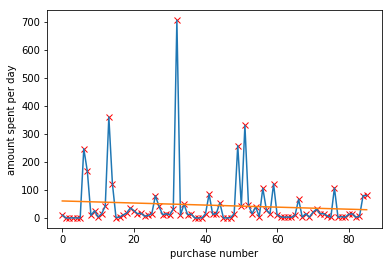

In [52]:
purchase_analysis() 

In [53]:
purchase_analytics_text()

With mean: 7.0234 and standard deviation: 48.3059 
With this trend, your expenses could possibly increase to 55.33 at your next purchase.


In [54]:
# analytics_text(bills_01)
# Will have a difference with purchase_analytics_text since the data set is different

### Distances and Locations

In [55]:
distances_from_home = expense_categories_data_frame['distance_from_home_vector'].apply(pd.to_numeric, errors='coerce').fillna(0)   

### Dates and Time Evalutaion

Purchase by category

In [56]:
def determine_expense_category_value_counts_and_ranges(category):
    print(expense_categories_data_frame[category].value_counts())
    print('With overall size of: ', len(expense_categories_data_frame[category]))
    print('So end the range at, ', len(expense_categories_data_frame[category])-expense_categories_data_frame[category].value_counts()[0])


In [57]:
# determine_category_value_counts_and_ranges('merchant_category')

In [58]:
# determine_category_value_counts_and_ranges('purchase_category')

In [59]:
def visits_by_merchant_category():
    merchant_category_frame = expense_categories_data_frame['merchant_category'][:len(expense_categories_data_frame['merchant_category'])-expense_categories_data_frame['merchant_category'].value_counts()[0]
].value_counts()
    merchant_category_frame.plot(kind='barh', title='Number of Occurences by Merchant Type')

    plt.savefig('Number of Occurences by Merchant Type.png')

In [60]:
def purchases_by_category():
    purchase_category_frame = expense_categories_data_frame['purchase_category'][:len(expense_categories_data_frame['purchase_category'])-expense_categories_data_frame['purchase_category'].value_counts()[0]
].value_counts()
    purchase_category_frame.plot(kind='barh', title='Number of Occurences by Purchase Type')
    
    plt.savefig('Number of Occurences by Purchase Type.png')


In [61]:
def visits_by_merchant_name():
    merchant_name_category_frame = expense_categories_data_frame['merchant_with_highest_amount'][:len(expense_categories_data_frame['merchant_with_highest_amount'])-expense_categories_data_frame['merchant_with_highest_amount'].value_counts()[0]
].value_counts()
    merchant_name_category_frame.plot(kind='barh', title='Number of Occurences by Merchant')
    
    plt.savefig('Number of Occurences by Merchant.png')

In [62]:
def purchases_by_distance():
    pass
    #Define new frame as dictionary
    #Normalize purchase amounts
    #Then graph the dictionary
#     expense_categories_data_frame_dictionary = pd.DataFrame(dict(A = (purchase_amounts - mean(purchase_amounts))/stdev(purchase_amounts), B = distances_from_home)) 
#     expense_categories_data_frame_dictionary.plot(kind='hist', x='A', y='B', title='Amount Spent by Distance from Home', bins = 25)

# def purchases_by_distance():
#     expense_categories_data_frame.plot(kind='hist', x=distances_from_home, y=purchase_amounts, title='Amount Spent by Distance from Home')


In [63]:
purchases_by_distance()

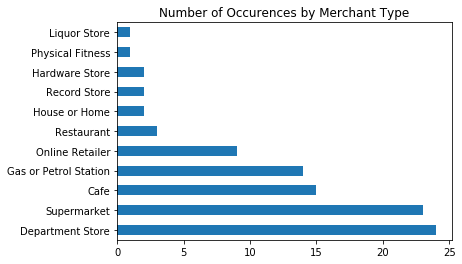

In [64]:
visits_by_merchant_category()

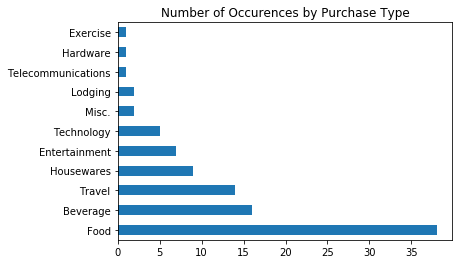

In [65]:
purchases_by_category()

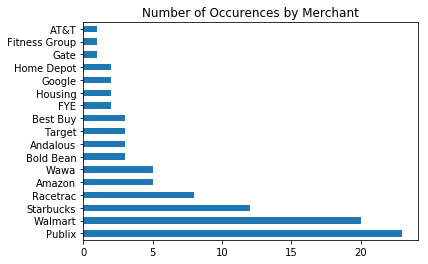

In [66]:
visits_by_merchant_name()

In [67]:
# perform_google_search('Publix')

In [68]:
load_all_data()

(    distance_from_home_in_miles distance_from_home_vector merchant_category  \
 0                             5                  0.059591       Supermarket   
 1                             3                 0.0349393      Liquor Store   
 2                                                              Record Store   
 3                                                           Online Retailer   
 4                                                           Online Retailer   
 
   merchant_with_highest_amount  purchase_amount purchase_category  \
 0                       Publix             10.0              Food   
 1                       Publix              0.0          Beverage   
 2                          FYE              0.0     Entertainment   
 3                       Amazon              0.0     Entertainment   
 4                       Amazon              0.0     Entertainment   
 
   purchase_date recurring repurchase  
 0    31/12/2018     FALSE       TRUE  
 1    01/01/2019

In [69]:
google_places = GooglePlaces(api_key_data_frame['GooglePlaces'][1])

In [70]:
# import geocoder
# g = geocoder.ip('me')
# print(type(g.latlng))
# print(g.latlng[0])
# print(g.latlng[1])


Nearby Places Test Set

In [71]:
# query_results = google_places.nearby_search(
#         lat_lng={'lat': 30.184624, 'lng': -81.552726}, 
#         radius=3200,
#         types=[types.TYPE_RESTAURANT] or [types.TYPE_CAFE])

# for place in query_results.places:
#      place.get_details()
#      print('%s' % (place.name))

In [72]:

# for place in query_results.places:
#      place.get_details()
#      print('%s %s %s' % (place.name, place.geo_location, place.types))


In [73]:
def find_nearby_places():
    query_results = google_places.nearby_search(
            lat_lng={'lat': 30.184624, 'lng': -81.552726}, 
            radius=5000)

    for place in query_results.places:
         place.get_details()
         print('%s %s' % (place.name, place.types))

In [74]:
def places_near_me():
    get_current_location()
    query_results = google_places.nearby_search(
            lat_lng={'lat': get_current_location()[0], 'lng': get_current_location()[1]}, 
            radius=5000)

    for place in query_results.places:
         place.get_details()
         print('%s %s' % (place.name, place.types))

In [75]:
#places_near_me()

In [76]:
def find_nearby_restaurants():
    query_results = google_places.nearby_search(
            lat_lng={'lat': 30.184624, 'lng': -81.552726}, 
            radius=3200, types=[types.TYPE_RESTAURANT])
    
    for place in query_results.places:
         place.get_details()
         print('%s' % (place.name))

In [77]:
def restaurants_near_me():
    get_current_location()
    query_results = google_places.nearby_search(
            lat_lng={'lat': get_current_location()[0], 'lng': get_current_location()[1]}, 
            radius=3400, types=[types.TYPE_RESTAURANT])

    for place in query_results.places:
         place.get_details()
         print('%s' % (place.name))

In [78]:
restaurants_near_me()


India's Restaurant
Domino's Pizza
Chili's Grill & Bar
Red Lobster
Tijuana Flats
Subway Restaurants
Pizza Hut
Subway Restaurants
Al's Pizza
4 Rivers Smokehouse
Panera Bread
LongHorn Steakhouse
Istanbul Grille & Hookah Lounge
Sake Sushi
IHOP
Gator's Dockside Baymeadows
The Loop Pizza Grill
Mandaloun Mediterranean Cuisine
5thElement Indian Restaurant
Bowl of Pho


In [79]:
# get_current_location()


In [80]:
# find_nearby_restaurants()


In [81]:
def find_nearby_cafes():
    query_results = google_places.nearby_search(
            lat_lng={'lat': 30.184624, 'lng': -81.552726}, 
            radius=3200, types=[types.TYPE_CAFE])
    
    for place in query_results.places:
         place.get_details()
         print('%s' % (place.name))

In [82]:
def cafes_near_me():
    get_current_location()
    query_results = google_places.nearby_search(
            lat_lng={'lat': get_current_location()[0], 'lng': get_current_location()[1]}, 
            radius=3400, types=[types.TYPE_CAFE])

    for place in query_results.places:
         place.get_details()
         print('%s' % (place.name))

In [83]:
cafes_near_me()


Panera Bread
Julie's Cafe
Starbucks
Dunkin'
Reflection Cafe
The Coffee Grinder
Aroma Corner
Five Fx Ice Cream
Mocharita's Deli
Metro Diner
Christian Corner Deli New York Meats Cheeses Jacksonville Fl
Lifetree Café
McDonald's
Dunkin'
RaceTrac
Boutique du Pain
Circle K
Circle K
Circle K
Starbucks


In [84]:
# g = geocoder.mapquest(['Mountain View, CA', 'Boulder, Co'], method='batch')
# for result in g:
#     print(result.address, result.latlng)


In [85]:
# find_nearby_cafes()


In [86]:
def find_nearby_bars():
    query_results = google_places.nearby_search(
            lat_lng={'lat': 30.184624, 'lng': -81.552726}, 
            radius=3200, types=[types.TYPE_BAR])
    
    for place in query_results.places:
         place.get_details()
         print('%s' % (place.name))

In [87]:
def bars_near_me():
    get_current_location()
    query_results = google_places.nearby_search(
            lat_lng={'lat': get_current_location()[0], 'lng': get_current_location()[1]}, 
            radius=3400, types=[types.TYPE_BAR])

    for place in query_results.places:
         place.get_details()
         print('%s' % (place.name))

In [88]:
bars_near_me()


Chili's Grill & Bar
Red Lobster
LongHorn Steakhouse
Gator's Dockside Baymeadows
Mandaloun Mediterranean Cuisine
5thElement Indian Restaurant
Pagoda Restaurant
La Nopalera Mexican Restaurant
My Place Bar & Grill
Veterans United Craft Brewery
Maa Kitchen
Smash
Mojitos Caribbean Cuisine Bar And Grill
Salsas of Philips Highway
My Tap Room
Chelsea's Bar & Grille
1000 Degrees Pizza Salad Wings Jacksonville
Paradise Gentlemen's Club
Eagle's Bar & Cafe
Restaurante Brasileiro Jacksonville


In [89]:
#Redundant
# def find_places_to_drink():
#     find_nearby_cafes()
#     find_nearby_bars()

In [90]:
# determine_category_value_counts_and_ranges('purchase_amount')

### View the budget

In [91]:
# Plot Data
def budget_image():
    # visual_expense = pd.read_excel("bills_01.xlsx")
    # Change "person 1" and "person 2" to draw names from spreadsheet
    # data = pd.DataFrame([visual_expense], index = ["person 1", "person 2"])
    
    features = list(data)
    number_of_features = len(features)
    
    values_for_person_one = data.iloc[0].tolist()
    values_for_person_one += values_for_person_one[:1]
    
    values_for_person_two = data.iloc[1].tolist()
    values_for_person_two += values_for_person_two[:1]
    
    angles = [n / float(number_of_features) * 2 * pi for n in range(number_of_features)]
    angles += angles[:1]
    
    ax = plt.subplot(111, polar = True)
    
    plt.xticks(angles[:-1], features)
    
    ax.plot(angles, values_for_person_one)
    ax.plot(angles, values_for_person_two)
    
    ax.fill(angles, values_for_person_one, 'blue', alpha = 0.1)
    axis.set_title("Person 1")
    plt.show()
    
    ax.fill(angles, values_for_person_two, 'red', alpha = 0.1)
    axis.set_title("Person 2")
    plt.show()
    
    
#    Pie chart
#    labels = 'Rent', 'Water', 'Power', 'Retirement', 'Health Care', 'Car Insurance', 'Rent Insurance', 'PAY PERIOD'
#    sizes = [rental, wat_bill, pow_bill, ret_ded, health_ded, car_ins, rent_ins, PAY_PERIOD()]
#    explode = (0, 0, 0, 0, 0, 0, 0, 0.1)

#    fig1, ax1 = plt.subplots()
#    ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.2f%%',
#            shadow = True, startangle = 90)
#    ax1.axis('equal') # aspect ratio to make it a circle
#    plt.show()

##### Budget view function

In [92]:
def view_test_budget(person, data):    
    
    
#   features = list(pd.DataFrame([pd.read_excel("bills_01.xlsx")], index = ["person 1", "person 2"]))
    features = ["Rent", "Water", "Power", "Entertainment", "Health Care", "Insurance: Car", "Insurance: Housing", "Else"]
    features_of_interest = len(features)
    
    data += data [:1]
    
    angles = [n / (features_of_interest) * 2 * pi for n in range(features_of_interest)]
    angles += angles [:1]
    
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1], features)
    ax.plot(angles, data)
    ax.fill(angles, data, 'red', alpha=0.1)

    ax.set_title(person)
    plt.show()
    
# features = list(pd.DataFrame([pd.read_excel("bills_01.xlsx")], index = ["person 1", "person 2"]))
# features = ["Rent", "Water", "Power", "Entertainment", "Health Care", "Insurance: Car", "Insurance: Housing", "Else"]
# features_of_interest = len(features) + 1
# print(features_of_interest)    

In [93]:

def determine_work_category_value_counts_and_ranges(category):
    print(work_hours_categories_data_frame[category].value_counts())
    print('With overall size of: ', len(work_hours_categories_data_frame[category]))
    print('So end the range at, ', len(work_hours_categories_data_frame[category])-work_hours_categories_data_frame[category].value_counts()[0])


In [94]:
# determine_work_category_value_counts_and_ranges('actual_net_annual_salary')


In [95]:
# work_hours_categories_data_frame.groupby(['actual_net_annual_salary', 'week_of'])


In [96]:
# categorized_purchases = expense_related_worksheet.get_worksheet(5)

# categorized_purchases_data_frame_source = pd.DataFrame(categorized_purchases.get_all_records())

# categorized_purchases_data_frame = categorized_purchases_data_frame_source.copy()

# categorized_purchases_data_frame.head()


Testing area for graphs of budget information.

In [97]:
# expense_categories_data_frame.head()

In [98]:
# expense_categories_data_frame['purchase_category'].value_counts()

#grouped_purchases_source = expense_categories_data_frame.groupby(['purchase_category'])['purchase_amount'].sum()
#grouped_purchases_source = expense_categories_data_frame.groupby(['purchase_category']).sum()

#grouped_purchases_source = expense_categories_data_frame.groupby(['purchase_category']).agg({'purchase_amount': 'sum'}).reset_index()[1:]

#print(type(grouped_purchases_source[1:]))
#print(grouped_purchases_source[1:])

#grouped_purchase_categories = pd.DataFrame(grouped_purchases_source, columns=['purchase_category','purchase_amount'])

#print(grouped_purchase_categories)

# grouped_purchase_category = pd.DataFrame(columns = ['purchase_category', 'purchase_amount'], 
#                                         index = [expense_categories_data_frame['purchase_category'], expense_categories_data_frame['purchase_amount']])

# grouped_purchase_category = pd.DataFrame(columns =['purchase_category', 'purchase_amount']) 

# i=0
# j=0
# for field in list(expense_categories_data_frame['purchase_category'].unique()):
#     for value in dict(expense_categories_data_frame.groupby(['purchase_category']).sum()[1:])['purchase_amount']:

#         grouped_purchase_category.loc[i] = (field, value)
#     i += 1
    
#     amount = grouped_purchases_source
#     grouped_purchase_category.loc[i] = (field, amount)
#     i += 1

#     for float in list(expense_categories_data_frame['purchase_amount']):
#         amount = expense_categories_data_frame['purchase_amount']
#         j+=1
#     grouped_purchase_category.loc[i] = (field, amount)
#     i += 1
    
#print(grouped_purchase_category)
#print(grouped_purchases_source)

#grouped_purchase_categories = grouped_purchases_source['purchase_category']

In [99]:
# grouped_purchases_source = expense_categories_data_frame.groupby(['purchase_category']).sum()

# print(type(grouped_purchases_source[1:]))
# print(grouped_purchases_source[1:])

#(expense_categories_data_frame['purchase_amount'])

# for float in dict(expense_categories_data_frame.groupby(['purchase_category']).sum()[1:])['purchase_amount']:
#     print (float)

In [100]:
# grouped_purchases_source.head()

In [101]:
# grouped_purchase_categories['purchase_category'][1:]

In [102]:
# grouped_purchase_categories['purchase_amount'][1:]


In [103]:
# categorized_merchants = expense_related_worksheet.get_worksheet(6)

# categorized_merchants_data_frame_source = pd.DataFrame(categorized_merchants.get_all_records())

# categorized_merchants_data_frame = categorized_merchants_data_frame_source.copy()

# categorized_merchants_data_frame.head()


In [104]:
# expense_categories_data_frame['purchase_category'].unique()[:-1]

In [105]:
# grouped_purchases_source = expense_categories_data_frame.groupby(['purchase_category']).agg({'purchase_amount': 'sum'}).reset_index()[1:]

# print('Purchase amount length is ', len(grouped_purchases_source['purchase_amount']))
# print('Purchase category length is ',len(grouped_purchases_source['purchase_category']))

In [106]:
# grouped_merchant_source = expense_categories_data_frame.groupby(['merchant_with_highest_amount']).agg({'purchase_amount': 'sum'}).reset_index()[1:]

# print('Purchase amount length is ', len(grouped_merchant_source['purchase_amount']))
# print('merchant_with_highest_amount length is ',len(grouped_merchant_source['merchant_with_highest_amount']))


In [107]:
def view_annual_budget():
    
    #Just to make sure the data gets loaded properly
    #The lines below reload the categorized purchases data frame
#     categorized_purchases = expense_related_worksheet.get_worksheet(5)
#     categorized_purchases_data_frame_source = pd.DataFrame(categorized_purchases.get_all_records())
#     categorized_purchases_data_frame = categorized_purchases_data_frame_source.copy()
    
    grouped_purchases_source = expense_categories_data_frame.groupby(['purchase_category']).agg({'purchase_amount': 'sum'}).reset_index() 
    features = grouped_purchases_source['purchase_category'][1:]
#     features = expense_categories_data_frame['purchase_category'].unique()[:-1]
#     features = list(categorized_purchases_data_frame['categories'])
    features_of_interest = len(features)
    
    data = grouped_purchases_source['purchase_amount']
#    data += data[:1]
    
    angles = [n / (features_of_interest) * 2 * pi for n in range(features_of_interest)]
    angles += angles [:1]
    
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1], features)
    ax.plot(angles, data)
    ax.fill(angles, data, 'blue', alpha=0.3)

    ax.set_title("Your Annual Budget")
    
    plt.savefig("Your Annual Budget.png")
    plt.show()

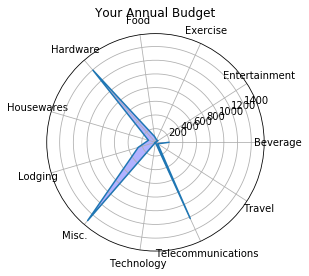

In [108]:
view_annual_budget()


In [109]:
def view_merchant_spending():
    
    grouped_merchant_source = expense_categories_data_frame.groupby(['merchant_with_highest_amount']).agg({'purchase_amount': 'sum'}).reset_index()[1:]
    
    features = grouped_merchant_source['merchant_with_highest_amount'][1:]
    features_of_interest = len(features)
    
    data = grouped_merchant_source['purchase_amount']
    
    angles = [n / (features_of_interest) * 2 * pi for n in range(features_of_interest)]
    angles += angles [:1]
    
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1], features)
    ax.plot(angles, data)
    ax.fill(angles, data, 'blue', alpha=0.3)

    ax.set_title("Your Most Visited Merchants")
    plt.savefig("Your Most Visited Merchants.png")
    
    plt.show()

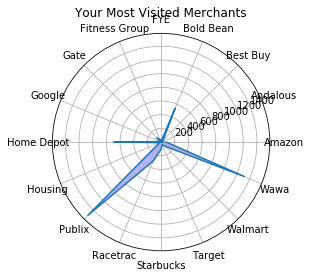

In [110]:
view_merchant_spending()

***

Begin back propagation...or not since it's just a more complicated version of gradient descent

In [111]:
sigma = lambda z : 1 / (1 + np.exp(-z))
d_sigma = lambda z : np.cosh(z/2)**(-2) / 4

#initialize network structure and clear past trainings
def reset_network (n1 = 6, n2 = 7, random=np.random) :
    global W1, W2, W3, b1, b2, b3
    W1 = random.randn(n1, 1) / 2
    W2 = random.randn(n2, n1) / 2
    W3 = random.randn(2, n2) / 2
    b1 = random.randn(n1, 1) / 2
    b2 = random.randn(n2, 1) / 2
    b3 = random.randn(2, 1) / 2

#generate the network
def network_function(a0):
    z1 = W1 @ a0 + b1
    a1 = sigma(z1)
    z2 = W2 @ a1 + b2
    a2 = sigma(z2)
    z3 = W3 @ a2 + b3
    a3 = sigma(z3)
    return a0, z1, a1, z2, a2, z3, a3

#Cost function
def cost(x, y) :
    return np.linalg.norm(network_function(x)[-1] - y)**2 / x.size

#first node
def J_W3 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = J @ a2.T / x.size
    return J

def J_b3 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y) 
    J = J * d_sigma(z3)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

#second node
def J_W2 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)    
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = J @ a1.T / x.size
    return J

def J_b2 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

#third node
def J_W1 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = (J.T @ W2).T
    J = J * d_sigma(z1)
    J = J @ a0.T / x.size
    return J

def J_b1 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = (J.T @ W2).T
    J = J * d_sigma(z1)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

Begin machine learning prediction MK II: SGD Classification

In [112]:
from sklearn.linear_model import SGDClassifier

# classifier = SGDClassifier(loss="L2", penalty="none", max_iter=10)
#L2 norm not supported

###### Begin prediction MK I: gradient descent

Notes:
    Python doesn't immediately intepret the full set of dimensions for a multidimensional array if one of the the dimentions is 1.
     Culprit 1: So must cast as np.matrix to compensate.
     Culprit 2: Not able to handle very large numbers. So we can import Decimal.
     Culprit 3: Possibly using np.power() might bypass computational error
     Culprit 4: np.square also induces computational error
     Culprit 5: Cross products don't work since they will result in an orthogonal vector
     Culprit 6: np.vectorize ????
     Culprit 7: reduce(fxn, array)
     Culprit 8: Fuck it. Run without any instances of np.matrix.

In [113]:
x = np.matrix('1, 2; 3, 4; 5, 0')
squarer = lambda t: t ** 2
#vfunc = np.vectorize(squarer)
#vfunc(x)

In [114]:
from functools import reduce
def my_reduce(x, y):
    length=len(x[0])-1
    newY = y**2
    # print('x', 
    # x,
    # 'beg len',
    # len(x[0]),
    # 'end len',
    # x[0][len(x[0])-1]
    # ,'y', y)


    # 1) component wise squaring
    x[0].append(newY)
    # 2) dot product for each value.
    x[1] = x[0][length]+newY
    # 3) delta of component wise by dot product.
    x[2] = (x[1] - x[0][length+1])

    return x

print(reduce(my_reduce, [1, 2, 3], [[0],0,0]))

[[0, 1, 4, 9], 13, 4]


In [123]:
from decimal import Decimal
from functools import reduce

def gradientDescent(x, y, theta, alpha, N, iterations):
    for iter in range(iterations):
#         x_transpose = x.transpose()
        hypothesis = np.dot(x, theta)
        squared_errors = (hypothesis - y) **2
        cost = squared_errors / (2 * N)
#         print("At iteration {}, the cost is {}".format(iter, cost))

        gradient = np.dot(x, squared_errors) / N
        # update theta
        theta = theta - alpha * gradient

    return theta

# print(type(i))
# print(type(bills_01))

# print((np.dot(i, theta) - bills_01).shape)
# print((bills_01).shape)
# print(np.matrix(i))

grouped_purchases_source = expense_categories_data_frame.groupby(['purchase_category']).agg({'purchase_amount': 'sum'}).reset_index() 
i = range(0, len(expense_categories_data_frame['purchase_amount'])-expense_categories_data_frame['purchase_amount'].value_counts()[0]+1)
j = purchase_amounts[0:len(expense_categories_data_frame['purchase_amount'])-expense_categories_data_frame['purchase_amount'].value_counts()[0]+1]
N = len(i)
# temp_N = len(temp_i)
iterations = 10000
alpha = 0.000000000005

theta = np.ones(N)
# temp_theta = np.ones(temp_N)
theta = gradientDescent(i, j, theta, alpha, N, iterations)
# print("({:0.4f},{:0.4f})".format(theta[0][0], theta[1]))
print(type(theta))
print(theta.shape)
print(theta[0])
# theta = gradientDescent(temp_i, temp_bills, temp_theta, alpha, temp_N, iterations)

# Determine the capacity for what can be done in the vein of gradient descent on cost here

<class 'numpy.ndarray'>
(86,)
0.03929499570611901
